In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
OPENAI_API_KEY=os.getenv("OPENAI_API_KEY")

In [3]:
 from langchain_openai import ChatOpenAI
 llm = ChatOpenAI(model="gpt-3.5-turbo")

In [4]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

# This will be a tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b
    
def divide(a: int, b: int) -> float:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a / b

In [5]:
tools = [add, multiply, divide]
llm_with_tools = llm.bind_tools(tools)

In [6]:
from langgraph.graph import MessagesState
from langchain.schema import SystemMessage


# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing arithmetic on a set of inputs.")

# Node
def assistant(state: MessagesState):
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

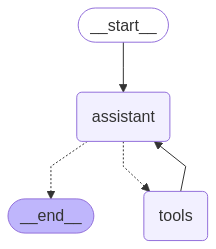

In [7]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition, ToolNode

from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine the control flow
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")
react_graph = builder.compile()

# graph = builder.compile()
react_graph

In [9]:
messages = [HumanMessage(content="Add 3 and 4. Multiply the output by 2. Divide the output by 5")]
messages = react_graph.invoke({"messages": messages})
langgraph.verbose=True
for m in messages['messages']:
    m.pretty_print()

NameError: name 'langgraph' is not defined

In [19]:
for m in messages['messages']:
    print(m)

content='Add 3 and 4. Multiply the output by 2. Divide the output by 5' additional_kwargs={} response_metadata={} id='387bb48c-c01c-47b9-87b6-7e36d4911f5d'
content='' additional_kwargs={'tool_calls': [{'id': 'call_ma9PPKq4Uiz0l5YEWl7otgPO', 'function': {'arguments': '{"a": 3, "b": 4}', 'name': 'add'}, 'type': 'function'}, {'id': 'call_ZoOl4tM0z8FEhOySOIjYSqy8', 'function': {'arguments': '{"a": 7, "b": 2}', 'name': 'multiply'}, 'type': 'function'}, {'id': 'call_ctG0MnseVj5nAqvNn1ItSwIL', 'function': {'arguments': '{"a": 14, "b": 5}', 'name': 'divide'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 67, 'prompt_tokens': 154, 'total_tokens': 221, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BTA0qG4u6z9EF4